#Sequence classification for credit-card fraud detection


In [ ]:
# Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from numpy import where
from numpy.testing import assert_array_almost_equal
import seaborn as sns


# Oversampling
from imblearn.over_sampling import RandomOverSampler, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, backend
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Settings
import warnings
warnings.filterwarnings("ignore")


## Data Prepocessing

In [ ]:
ds = pd.read_csv("../input/fraud-detection/fraudTrain.csv")[:100000] 
ds.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [ ]:
ds.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,49999.500000,4.183992e+17,71.908232,48720.506960,38.538809,-90.179763,8.918773e+04,1.327916e+09,38.539719,-90.180833,0.009900
std,28867.657797,1.309964e+18,145.895400,26895.490176,5.077738,13.771942,3.015788e+05,1.459296e+06,5.110508,13.783471,0.099005
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000
25%,24999.750000,1.800365e+14,9.710000,26041.000000,34.668900,-96.790900,7.430000e+02,1.326627e+09,34.750439,-96.867861,0.000000
50%,49999.500000,3.519607e+15,48.150000,48174.000000,39.354300,-87.458100,2.456000e+03,1.327877e+09,39.365135,-87.407044,0.000000
75%,74999.250000,4.642255e+15,83.870000,72011.000000,41.894800,-80.128400,2.047800e+04,1.329150e+09,41.943393,-80.180297,0.000000
max,99999.000000,4.992346e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.330444e+09,66.659242,-66.967742,1.000000


## Sanity Check

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             100000 non-null  int64  
 1   trans_date_trans_time  100000 non-null  object 
 2   cc_num                 100000 non-null  int64  
 3   merchant               100000 non-null  object 
 4   category               100000 non-null  object 
 5   amt                    100000 non-null  float64
 6   first                  100000 non-null  object 
 7   last                   100000 non-null  object 
 8   gender                 100000 non-null  object 
 9   street                 100000 non-null  object 
 10  city                   100000 non-null  object 
 11  state                  100000 non-null  object 
 12  zip                    100000 non-null  int64  
 13  lat                    100000 non-null  float64
 14  long                   100000 non-nul

In [ ]:
ds = ds.drop(labels = ['Unnamed: 0', 'trans_date_trans_time','street', 'first', 'last', 'city', 'zip', 'trans_num'], axis = 1) 

In [ ]:
sum(ds.isnull().sum())

0

In [ ]:
ds.duplicated().sum()

0

In [ ]:
Counter(ds.is_fraud)

Counter({0: 99010, 1: 990})

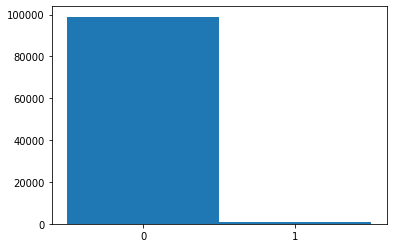

In [ ]:
labels, values = zip(*Counter(ds.is_fraud).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes, labels)
plt.show()

## Data Preprocessing



In [ ]:
ds['birth_year'] = ds['dob'].apply(lambda x: int(x[0:4]))
ds['birth_month'] = ds['dob'].apply(lambda x: int(x[5:7]))
ds['birth_day'] = ds['dob'].apply(lambda x: int(x[8:]))

In [ ]:
ds.head()

,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,birth_year,birth_month,birth_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,1988,3,9
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,1978,6,21
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,1962,1,19
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,1967,1,12
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,1986,3,28


In [ ]:
ds = ds.drop(['dob'], axis=1)

### Converting all categorical values to dummy variables

In [ ]:

for col in ds.columns:
    if ds[col].dtypes == object:
        dummy = pd.get_dummies(ds[col])
        ds = ds.drop(col,axis=1)
        ds = pd.concat([ds,dummy], axis=1)

ds.head()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,birth_year,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,2703186189652095,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,1988,...,0,0,0,0,0,0,0,0,0,0
1,630423337322,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,1978,...,0,0,0,0,0,0,0,0,0,0
2,38859492057661,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1962,...,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1967,...,0,0,0,0,0,0,0,0,0,0
4,375534208663984,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1986,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sc=StandardScaler()

to_scale=['cc_num','amt','lat','long','city_pop','unix_time','merch_lat','merch_long','birth_year','birth_day','birth_month']

for var in to_scale:
    ds[var] = sc.fit_transform(ds[var].values.reshape(-1,1))


In [ ]:
ds.head()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,birth_year,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,-0.317336,-0.458812,-0.484472,0.653627,-0.284149,-1.740782,-0.494753,0.590023,0,0.851265,...,0,0,0,0,0,0,0,0,0,0
1,-0.319399,0.242105,2.038121,-2.035361,-0.295244,-1.740764,2.077950,-2.031837,0,0.275315,...,0,0,0,0,0,0,0,0,0,0
2,-0.319369,1.015813,0.717250,-1.603430,-0.281963,-1.740759,0.902260,-1.594211,0,-0.646205,...,0,0,0,0,0,0,0,0,0,0
3,-0.316701,-0.184436,1.514814,-1.592669,-0.289308,-1.740742,1.662194,-1.623709,0,-0.358230,...,0,0,0,0,0,0,0,0,0,0
4,-0.319112,-0.205273,-0.023260,0.778170,-0.295409,-1.740667,0.026471,0.837846,0,0.736075,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
variable_column = ds.drop('is_fraud', 1)
features = variable_column.columns
features

Index(['cc_num', 'amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'birth_year', 'birth_month',
       ...
       'Video editor', 'Visual merchandiser', 'Volunteer coordinator',
       'Warden/ranger', 'Waste management officer', 'Water engineer',
       'Water quality scientist', 'Web designer', 'Wellsite geologist',
       'Writer'],
      dtype='object', length=1249)

## Preparing of Train and Test Sets

In [ ]:
X = ds.drop('is_fraud', axis=1)
y = ds.is_fraud.values

In [ ]:
X.shape

(100000, 1249)

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.20,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

# Spilt train val for LSTM
x_train_train, x_train_val, y_train_train, y_train_val = train_test_split(x_train, y_train, test_size=0.10,random_state=42)

## Preparing Unseen Data

In [ ]:
unseen_data = []

for i in range(n_timesteps):
    x_train, x_unseen, y_train, y_unseen = train_test_split(x_train,y_train,test_size=(0.05+i*0.005), random_state=42)
    unseen_data.append([x_train, x_unseen, y_train, y_unseen])
    print(x_unseen.shape)
    print(Counter(y_unseen))

(4000, 1249)
Counter({0: 3955, 1: 45})
(4180, 1249)
Counter({0: 4137, 1: 43})
(4310, 1249)
Counter({0: 4270, 1: 40})
(4389, 1249)
Counter({0: 4341, 1: 48})
(4419, 1249)
Counter({0: 4379, 1: 40})
(4403, 1249)
Counter({0: 4357, 1: 46})
(4344, 1249)
Counter({0: 4301, 1: 43})
(4247, 1249)
Counter({0: 4210, 1: 37})
(4114, 1249)
Counter({0: 4073, 1: 41})
(3952, 1249)
Counter({0: 3915, 1: 37})
(3765, 1249)
Counter({0: 3731, 1: 34})
(3558, 1249)
Counter({0: 3515, 1: 43})
(3336, 1249)
Counter({0: 3305, 1: 31})
(3104, 1249)
Counter({0: 3081, 1: 23})
(2866, 1249)
Counter({0: 2838, 1: 28})


##LSTM

In [ ]:
# Building a vanilla LSTM

model = tf.keras.Sequential()
model.add(layers.Reshape(target_shape=(1,x_train.shape[1])))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.GlobalMaxPooling1D())

model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(tf.keras.optimizers.Adam(learning_rate = 0.01),loss='binary_crossentropy',metrics=['accuracy', "Precision", "Recall", tf.keras.metrics.AUC()])

In [ ]:
# Define Early Stopping
# Find the best number of epoch for model training (based on monitoring val_loss)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(x_train_train, y_train_train, epochs=50, validation_data= (x_train_val,y_train_val), callbacks =[stop_early])

val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
2250/2250 [==============================] - 15s 6ms/step - loss: 0.0367 - accuracy: 0.9915 - precision: 0.6215 - recall: 0.2923 - auc_8: 0.8806 - val_loss: 0.0300 - val_accuracy: 0.9918 - val_precision: 0.7164 - val_recall: 0.5053 - val_auc_8: 0.9384
Epoch 2/50
2250/2250 [==============================] - 12s 5ms/step - loss: 0.0177 - accuracy: 0.9954 - precision: 0.8502 - recall: 0.6324 - auc_8: 0.9607 - val_loss: 0.0206 - val_accuracy: 0.9944 - val_precision: 0.7907 - val_recall: 0.7158 - val_auc_8: 0.9634
Epoch 3/50
2250/2250 [==============================] - 12s 5ms/step - loss: 0.0107 - accuracy: 0.9967 - precision: 0.8916 - recall: 0.7496 - auc_8: 0.9853 - val_loss: 0.0331 - val_accuracy: 0.9937 - val_precision: 0.7528 - val_recall: 0.7053 - val_auc_8: 0.9182
Epoch 4/50
2250/2250 [==============================] - 13s 6ms/step - loss: 0.0086 - accuracy: 0.9974 - precision: 0.9030 - recall: 0.8220 - auc_8: 0.9897 - val_loss: 0.0272 - val_accuracy: 0.9945 - val_precisi

In [ ]:
# Training the model with the best number of epoch
model.fit(x_train_train, y_train_train, epochs=best_epoch, validation_data= (x_train_val,y_train_val))

Epoch 1/2
2250/2250 [==============================] - 12s 6ms/step - loss: 0.0022 - accuracy: 0.9996 - precision: 0.9798 - recall: 0.9826 - auc_8: 0.9956 - val_loss: 0.1185 - val_accuracy: 0.9950 - val_precision: 0.8986 - val_recall: 0.6526 - val_auc_8: 0.8573
Epoch 2/2
2250/2250 [==============================] - 13s 6ms/step - loss: 0.0024 - accuracy: 0.9997 - precision: 0.9841 - recall: 0.9841 - auc_8: 0.9971 - val_loss: 0.1255 - val_accuracy: 0.9959 - val_precision: 0.8875 - val_recall: 0.7474 - val_auc_8: 0.8836


In [ ]:
# Evaluate the model with the test set
loss, accuracy, precision, recall, AUC = model.evaluate(x_test, y_test)

print("LSTM test results")
print("Loss: ", loss)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print('AUC: ', AUC)

f1 = 2*((precision*recall)/(precision+recall))
print('F1-measure: ', f1)
f2 = (5* precision * recall)/ (5* precision + recall)
print('F2 score:',f2)

results_dict ={}
score1 = {
    "accuracy":accuracy,
    "auc": AUC,
    "recall": recall,
    "precision":precision,
    "f1 measure": f1,
    "f2 measure": f2
}

results_dict['LSTM'] = score1

625/625 [==============================] - 2s 4ms/step - loss: 0.1194 - accuracy: 0.9962 - precision: 0.8765 - recall: 0.7304 - auc_8: 0.8941
LSTM test results
Loss:  0.11941924691200256
Accuracy:  0.9962000250816345
Precision:  0.8764705657958984
Recall:  0.7303921580314636
AUC:  0.8940529823303223
F1-measure:  0.7967914352732255
F2 score: 0.6260504187369833


## Random Forest Classifier

In [ ]:
#Create a Gaussian Classifier 
clf=RandomForestClassifier(n_estimators=150, random_state = 42)

#Train the model using the training set 
clf.fit(x_train,y_train)

# Predict on test set
y_pred=clf.predict(x_test)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Confusion_matrix:", metrics.confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:',metrics.auc(fpr, tpr))
print('F1 score:', metrics.f1_score(y_test, y_pred, average='weighted'))

f2 = (5* metrics.precision_score(y_test, y_pred) * metrics.recall_score(y_test, y_pred))/ (5* metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print('F2 score:',f2)

score = {
    "accuracy": metrics.accuracy_score(y_test, y_pred),
    "auc": metrics.auc(fpr, tpr),
    "recall": metrics.recall_score(y_test, y_pred),
    "precision": metrics.precision_score(y_test, y_pred),
    "f1 measure": metrics.f1_score(y_test, y_pred),
    "f2 measure": f2
    }

results_dict['Random Forest'] = score

Accuracy: 0.992
Recall: 0.21568627450980393
Precision: 1.0
Confusion_matrix: [[19796     0]
 [  160    44]]
AUC: 0.607843137254902
F1 score: 0.9894354546575868
F2 score: 0.2067669172932331


In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [ ]:
# Finding the most important features

clf.feature_importances_
feature_importances = pd.DataFrame(clf.feature_importances_, index =x_train.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances.index.array[:110]

<PandasArray>
[                              'amt',                         'merch_lat',
                        'merch_long',                         'unix_time',
                        'birth_year',                          'city_pop',
                              'long',                               'lat',
                            'cc_num',                         'birth_day',
 ...
                   'fraud_Brown Inc',                                'KY',
                                'DC', 'fraud_Schoen, Kuphal and Nitzsche',
  'fraud_Kutch, Steuber and Gerhold',             'fraud_Gottlieb-Hansen',
               'fraud_Koepp-Witting',             "fraud_Deckow-O'Conner",
               'Trade mark attorney',               'Retail merchandiser']
Length: 110, dtype: object

In [ ]:
# Retrieve top 110 features
x = x_train[feature_importances.index.array[:110]]    

In [ ]:
# Updated random forest

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150,random_state = 42)

#Train the model using the training set
clf.fit(x,y_train)

# Predict on test set with top 110 features
x_test_selected = x_test[feature_importances.index.array[:110]]  
y_pred=clf.predict(x_test_selected)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Confusion_matrix:", metrics.confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:',metrics.auc(fpr, tpr))
print('F1 score:', metrics.f1_score(y_test, y_pred, average='weighted'))

f2 = (5* metrics.precision_score(y_test, y_pred) * metrics.recall_score(y_test, y_pred))/ (5* metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print('F2 score:',f2)


score3 = {
    "accuracy": metrics.accuracy_score(y_test, y_pred),
    "auc": metrics.auc(fpr, tpr),
    "recall": metrics.recall_score(y_test, y_pred),
    "precision": metrics.precision_score(y_test, y_pred),
    "f1 measure": metrics.f1_score(y_test, y_pred),
    "f2 measure": f2
    }

results_dict['Random Forest after pruning'] = score3

Accuracy: 0.9952
Recall: 0.5588235294117647
Precision: 0.95
Confusion_matrix: [[19790     6]
 [   90   114]]
AUC: 0.7792602189390608
F1 score: 0.9945828589351524
F2 score: 0.5


##LSTM layer after Random Forest

In [ ]:
# Building Vanilla LSTM

model2 = tf.keras.Sequential()
model2.add(layers.Reshape(target_shape=(1,x_train.shape[1])))
model2.add(layers.LSTM(128, return_sequences=True))
model2.add(layers.GlobalMaxPooling1D())

model2.add(layers.Dense(128, activation="relu"))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(tf.keras.optimizers.Adam(learning_rate = 0.01),loss='binary_crossentropy',metrics=['accuracy', "Precision", "Recall", tf.keras.metrics.AUC()])

In [ ]:
# Define early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Find the best number of epoch to train model
history2 = model2.fit(x_train_train, y_train_train, epochs=50, validation_data= (x_train_val,y_train_val), callbacks =[stop_early])

val_loss_per_epoch2 = history2.history['val_loss']
best_epoch2 = val_loss_per_epoch2.index(min(val_loss_per_epoch2)) + 1
print('Best epoch: %d' % (best_epoch2,))

Epoch 1/50
2250/2250 [==============================] - 15s 6ms/step - loss: 0.0359 - accuracy: 0.9921 - precision: 0.6772 - recall: 0.3401 - auc_9: 0.8764 - val_loss: 0.0231 - val_accuracy: 0.9934 - val_precision: 0.8750 - val_recall: 0.5158 - val_auc_9: 0.9249
Epoch 2/50
2250/2250 [==============================] - 13s 6ms/step - loss: 0.0168 - accuracy: 0.9953 - precision: 0.8433 - recall: 0.6310 - auc_9: 0.9651 - val_loss: 0.0281 - val_accuracy: 0.9940 - val_precision: 0.9434 - val_recall: 0.5263 - val_auc_9: 0.9395
Epoch 3/50
2250/2250 [==============================] - 12s 6ms/step - loss: 0.0109 - accuracy: 0.9966 - precision: 0.8843 - recall: 0.7410 - auc_9: 0.9845 - val_loss: 0.0228 - val_accuracy: 0.9948 - val_precision: 0.8354 - val_recall: 0.6947 - val_auc_9: 0.9503
Epoch 4/50
2250/2250 [==============================] - 12s 5ms/step - loss: 0.0078 - accuracy: 0.9975 - precision: 0.9009 - recall: 0.8292 - auc_9: 0.9905 - val_loss: 0.0369 - val_accuracy: 0.9955 - val_precisi

In [ ]:
# Train validation set with the best number of epoch
model2.fit(x_train_train, y_train_train, epochs=best_epoch2, validation_data= (x_train_val,y_train_val))

Epoch 1/3
2250/2250 [==============================] - 13s 6ms/step - loss: 0.0019 - accuracy: 0.9996 - precision: 0.9783 - recall: 0.9783 - auc_9: 0.9956 - val_loss: 0.1172 - val_accuracy: 0.9949 - val_precision: 0.8214 - val_recall: 0.7263 - val_auc_9: 0.9043
Epoch 2/3
2250/2250 [==============================] - 12s 5ms/step - loss: 0.0020 - accuracy: 0.9997 - precision: 0.9827 - recall: 0.9841 - auc_9: 0.9964 - val_loss: 0.1204 - val_accuracy: 0.9960 - val_precision: 0.8889 - val_recall: 0.7579 - val_auc_9: 0.8993
Epoch 3/3
2250/2250 [==============================] - 13s 6ms/step - loss: 0.0035 - accuracy: 0.9995 - precision: 0.9768 - recall: 0.9754 - auc_9: 0.9963 - val_loss: 0.1321 - val_accuracy: 0.9941 - val_precision: 0.7500 - val_recall: 0.7579 - val_auc_9: 0.9090


In [ ]:
# Evaluate the test set
loss2, accuracy2, precision2, recall2, AUC2 = model2.evaluate(x_test, y_test)

print("LSTM with random forest test results")
print("Loss: ", loss2)
print("Accuracy: ", accuracy2)
print("Precision: ", precision2)
print("Recall: ", recall2)
print('AUC: ', AUC2)

f1_2 = 2*((precision2*recall2)/(precision2+recall2))
print('F1-measure: ', f1_2)
f2_2 = (5* precision2 * recall2)/ (5* precision2 + recall2)
print('F2 score:',f2_2)

score2 = {
    "accuracy":accuracy2,
    "auc": AUC2,
    "recall": recall2,
    "precision":precision2,
    "f1 measure": f1_2,
    "f2 measure": f2_2
    
}

results_dict['LSTM with Random Forest'] = score2

625/625 [==============================] - 2s 4ms/step - loss: 0.1256 - accuracy: 0.9955 - precision: 0.7805 - recall: 0.7843 - auc_9: 0.9034
LSTM with random forest test results
Loss:  0.1256212741136551
Accuracy:  0.9955499768257141
Precision:  0.7804877758026123
Recall:  0.7843137383460999
AUC:  0.9034447073936462
F1-measure:  0.7823960798072229
F2 score: 0.653061229331649


##Models Summary

In [ ]:
# Print results of all the models
results_dict

{'LSTM': {'accuracy': 0.9962000250816345,
  'auc': 0.8940529823303223,
  'recall': 0.7303921580314636,
  'precision': 0.8764705657958984,
  'f1 measure': 0.7967914352732255,
  'f2 measure': 0.6260504187369833},
 'Random Forest': {'accuracy': 0.992,
  'auc': 0.607843137254902,
  'recall': 0.21568627450980393,
  'precision': 1.0,
  'f1 measure': 0.3548387096774193,
  'f2 measure': 0.2067669172932331},
 'Random Forest after pruning': {'accuracy': 0.9952,
  'auc': 0.7792602189390608,
  'recall': 0.5588235294117647,
  'precision': 0.95,
  'f1 measure': 0.7037037037037037,
  'f2 measure': 0.5},
 'LSTM with Random Forest': {'accuracy': 0.9955499768257141,
  'auc': 0.9034447073936462,
  'recall': 0.7843137383460999,
  'precision': 0.7804877758026123,
  'f1 measure': 0.7823960798072229,
  'f2 measure': 0.653061229331649}}

In [ ]:
# Put all models' results into a dataframe
pd.DataFrame(results_dict)

,LSTM,Random Forest,Random Forest after pruning,LSTM with Random Forest
accuracy,0.996200,0.992000,0.995200,0.995550
auc,0.894053,0.607843,0.779260,0.903445
recall,0.730392,0.215686,0.558824,0.784314
precision,0.876471,1.000000,0.950000,0.780488
f1 measure,0.796791,0.354839,0.703704,0.782396
f2 measure,0.626050,0.206767,0.500000,0.653061
